# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Melissa Stone Rogers, [GitHub](https://github.com/meldstonerogers/wmnlp-final-project2)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [29]:
#import dependenceis 
from collections import Counter
import pickle
import requests
import spacy
from textblob import TextBlob
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
import numpy as np


!pip list

print('All prereqs installed.')

Package            Version
------------------ ------------
annotated-types    0.7.0
appnope            0.1.4
asttokens          3.0.0
beautifulsoup4     4.12.3
blis               1.0.1
catalogue          2.0.10
certifi            2024.8.30
charset-normalizer 3.4.0
click              8.1.7
cloudpathlib       0.20.0
comm               0.2.2
confection         0.1.5
contourpy          1.3.1
cycler             0.12.1
cymem              2.0.10
debugpy            1.8.9
decorator          5.1.1
en_core_web_sm     3.8.0
exceptiongroup     1.2.2
executing          2.1.0
fonttools          4.55.0
html5lib           1.1
idna               3.10
ipykernel          6.29.5
ipython            8.30.0
jedi               0.19.2
Jinja2             3.1.4
joblib             1.4.2
jupyter_client     8.6.3
jupyter_core       5.7.2
kiwisolver         1.4.7
langcodes          3.5.0
language_data      1.3.0
marisa-trie        1.2.1
markdown-it-py     3.0.0
MarkupSafe         3.0.2
matplotlib         3.9.3
matplo

## Question 1
1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [30]:
# get article
ozbook_html = requests.get('https://www.gutenberg.org/cache/epub/43936/pg43936-images.html')

#parse HTML content with bs4
parser = 'html5lib'

soup = BeautifulSoup(ozbook_html.content, parser)
# Uncomment next lines to explore full page contents; it's long so when done, recomment
#print(soup)
#print(soup.prettify())

# BeautifulSoup objects don't pickle well, so it's appropriate and polite to web developers to cache the text of the web page, or just dump it to an html file you can read in later as a regular file
with open('ozbook_html.pkl', 'wb') as f:
    pickle.dump(soup, f)
    print("HTML saved to ozbook_html.pkl.")

HTML saved to ozbook_html.pkl.


## Question 2
2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [33]:
# read in HTML content form pkl file
with open('ozbook_html.pkl', 'rb') as f:
    ozbook_html = pickle.load(f)

# Print the body of the HTML to find book text section
#print(soup.body.prettify())

# Find the main content div
ozbook_html = soup.find('div', class_='main')

# Check if the div is found
#if ozbook_html:
    #print(ozbook_html.get_text())
#else:
    #print("The desired element was not found.")

# load article text into trained spacy pipline
nlp = spacy.load('en_core_web_sm')
doc = nlp(ozbook_html.get_text())
blob = TextBlob(doc.text)

# sentiment analysis
polarity = blob.sentiment.polarity
print(f"The Wonderful Wizard of Oz\nPolarity Score:", polarity)

# Count every sentence in book 
sentence_count = len(list(doc.sents))
print(f"Number of Sentences in book:", sentence_count)



The Wonderful Wizard of Oz
Polarity Score: 0.12235099295112278
Number of Sentences in book: 1963


## Question 3
3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [34]:
# determine 5 most frequent tokens, converted to lower case, remove punct, stopwords, whitespace
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token for token in doc if we_care_about(token)]
word_freq = Counter(map(lambda token: str(token).lower(), interesting_tokens))
mostFreqtokens = word_freq.most_common(5)

# print common tokens and frequencies with appropriate label
print("Top 5 Most Frequent Tokens:")
for token, freq in mostFreqtokens:
    print(f"Token: '{token}', Frequency: {freq}")

Top 5 Most Frequent Tokens:
Token: 'dorothy', Frequency: 367
Token: 'said', Frequency: 335
Token: 'scarecrow', Frequency: 229
Token: 'woodman', Frequency: 182
Token: 'lion', Frequency: 179


## Question 4
4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [35]:
# determine 5 most frequent lemmas converted to lower case
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)
mostFreqlemmas = lemma_freq.most_common(5)

# print with appropriate lemmas
print("Top 5 Most Frequent Lemmas:")
for lemma, freq in mostFreqlemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")

Top 5 Most Frequent Lemmas:
Lemma: 'dorothy', Frequency: 367
Lemma: 'say', Frequency: 343
Lemma: 'scarecrow', Frequency: 231
Lemma: 'woodman', Frequency: 182
Lemma: 'lion', Frequency: 182


## Question 5
5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

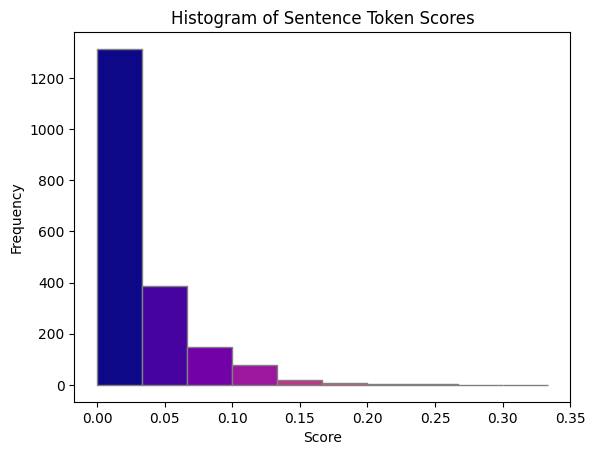

In [42]:
# Store frequent tokens in a set
cool_tokens = set()
for token, freq in mostFreqtokens:
    cool_tokens.add(token)

# Get every sentence in article 
sentences = list(doc.sents)

# Define score_sentence_by_token function
def score_sentence_by_token(sentence, interesting_tokens):
    # Tokenize the sentence
    token_count = sum(1 for token in sentence if token.text.lower() in interesting_tokens)
    # Return the ratio of interesting tokens to total tokens
    tokens_score = token_count / len(sentence)
    return tokens_score

# Create list to store scores 
sentence_scores = []

# Loop through each sentence and calculate score
for sentence in sentences:
    score = score_sentence_by_token(sentence, cool_tokens)
    sentence_scores.append(score)


# Print the token scores for all sentences
# for i, (sentence, score) in enumerate(zip(sentences, sentence_scores), 1):
    #print(f"Sentence {i}: '{sentence.text.strip()}' - Token Score: {score}")

    # Create histogram data
counts, bin_edges = np.histogram(sentence_scores, bins=10)

# Prepare vertices for the PolyCollection
verts = []
for i in range(len(bin_edges) - 1):
    verts.append([
        (bin_edges[i], 0),
        (bin_edges[i], counts[i]),
        (bin_edges[i + 1], counts[i]),
        (bin_edges[i + 1], 0),
    ])

# Create the gradient colors
gradient = np.linspace(0, 1, len(verts))
colors = plt.cm.plasma(gradient)

# Create a PolyCollection with the gradient colors
poly_collection = PolyCollection(verts, facecolors=colors, edgecolor='gray')

# Plot the PolyCollection
fig, ax = plt.subplots()
ax.add_collection(poly_collection)
ax.autoscale()
plt.title("Histogram of Sentence Token Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

# 0.0 to 0.25 is the most common score range 


## Question 6
6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

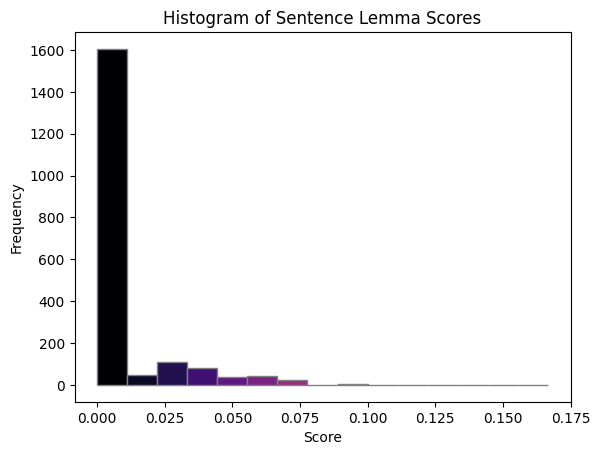

In [ ]:
# Store frequent lemmas in a set
cool_lemmas = set()
for lemma, freq in mostFreqlemmas:
    cool_lemmas.add(lemma)

# Get every sentence in article 
sentences = list(doc.sents)

# Define score_sentence_by_lemma function
def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Extract the raw text of the sentence
    sentence_text = sentence.text
    # Tokenize the sentence
    doc = nlp(sentence_text)
    # Count how many interesting lemmas appear in the sentence
    lemma_count = sum(1 for token in doc if token.lemma_ in interesting_lemmas)
    # Return the ratio of interesting lemmas to total tokens
    lemmas_score = lemma_count / len(doc)
    return lemmas_score

# Create list to store scores 
sentence_scores = []

# Loop through each sentence and calculate score
for sentence in sentences:
    score = score_sentence_by_lemma(sentence, cool_lemmas)
    sentence_scores.append(score)


# Print the token scores for all sentences
#for i, (sentence, score) in enumerate(zip(sentences, sentence_scores), 1):
    #print(f"Sentence {i}: '{sentence.text.strip()}' - Token Score: {score}")

    # Create histogram data
counts, bin_edges = np.histogram(sentence_scores, bins=15)

# Prepare vertices for the PolyCollection
verts = []
for i in range(len(bin_edges) - 1):
    verts.append([
        (bin_edges[i], 0),
        (bin_edges[i], counts[i]),
        (bin_edges[i + 1], counts[i]),
        (bin_edges[i + 1], 0),
    ])

# Create the gradient colors
gradient = np.linspace(0, 1, len(verts))
colors = plt.cm.magma(gradient)

# Create a PolyCollection with the gradient colors
poly_collection = PolyCollection(verts, facecolors=colors, edgecolor='gray')

# Plot the PolyCollection
fig, ax = plt.subplots()
ax.add_collection(poly_collection)
ax.autoscale()
plt.title("Histogram of Sentence Lemma Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

# 0.0 to 0.0125 is the most common score range for lemma scores 

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?